In [ ]:
'''Librerías'''
import numpy as np
import matplotlib.pyplot as plt
import pickle # Los modelos antiguos de ML no tienen método save y usan la librearia pickle para poder salvarse y cargarse.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
import keras
from keras.layers import Input, Add, Conv1D, BatchNormalization, Activation, Dense, Flatten, Dropout, AveragePooling1D
from keras.initializers import glorot_uniform
from keras.models import Model,Sequential 

In [ ]:
import random
import pandas as pd
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/SOMDrive/bacteriaID/

/content/drive/MyDrive/SOMDrive/bacteriaID


In [ ]:
'''Datos: Cambiar el acceso a los datos'''
X_fn = './data/X_reference.npy'
y_fn = './data/y_reference.npy'
X = np.load(X_fn)
y = np.load(y_fn)

In [ ]:
# dividimos el conjunto de referencia entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# redimensionamos los datos para que en lugar de ser un vector lineal de 1000 datos cada característica esté separada
X_tr_cnn = np.reshape(X_train,(X_train.shape[0],1000,1))
y_tr_cnn = np.reshape(y_train,(y_train.shape[0],1))

X_test_cnn = np.reshape(X_test,(X_test.shape[0],1000,1))
y_test_cnn = np.reshape(y_test,(y_test.shape[0],1))

In [ ]:
# pasamos a categoricas los datos de la clase
n_classes = 30
y_tr_cnn_c = keras.utils.to_categorical(y_tr_cnn, n_classes)
y_v_cnn_c = keras.utils.to_categorical(y_test_cnn, n_classes)


In [ ]:
# Modelo final seleccionado
M_input = Input((1000,1))
M = Conv1D(64, 5, strides=1, name='conv1', padding='same', input_shape=(1000,1))(M_input)
M = BatchNormalization(axis=2, epsilon=1e-05, momentum=0.1, name='bn_conv1')(M)
M = Activation('relu')(M)
M = Conv1D(100, 5, strides=1, name='conv2', padding='same', input_shape=(1000,1))(M)
M = BatchNormalization(axis=2, epsilon=1e-05, momentum=0.1, name='bn_conv2')(M)
M = Activation('relu')(M)
M = Conv1D(100, 5, strides=1, name='conv3', padding='same', input_shape=(1000,1))(M)
M = BatchNormalization(axis=2, epsilon=1e-05, momentum=0.1, name='bn_conv3')(M)
M = Activation('relu')(M)
M = Flatten() (M)
M = Dense(500, activation='relu')(M)
M = Dropout(0.5)(M)
M = Dense(n_classes, activation='softmax') (M)

model_cnn2 = Model(inputs=M_input, outputs=M, name='CNN2')
model_cnn2.summary()

Model: "CNN2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
conv1 (Conv1D)               (None, 1000, 64)          384       
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 1000, 64)          256       
_________________________________________________________________
activation (Activation)      (None, 1000, 64)          0         
_________________________________________________________________
conv2 (Conv1D)               (None, 1000, 100)         32100     
_________________________________________________________________
bn_conv2 (BatchNormalization (None, 1000, 100)         400       
_________________________________________________________________
activation_1 (Activation)    (None, 1000, 100)         0      

In [ ]:
# Set up Adam optimizer
optimizer = keras.optimizers.Adadelta(learning_rate=1e-3, rho=0.5, epsilon= 0.999)
model_cnn2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

## Aplicación de ruido al modelo CNN en los datos de test

Revisamos cómo afectaría el ruido al modelo entrenado con CNN utilizando, igual que para SVC el dataset de referencia, X_reference, y aplicando ruido al conjunto de test.

In [ ]:
# Para el caso de volver a cargar el modelo
model_cnn2 = keras.models.load_model('modelo_model_cnn2_entrenado.h5')

In [ ]:
# evaluamos el modelo conlos datos de entrenamiento
name = 'CNN2 ConvD1'
scores2_tr = model_cnn2.evaluate(X_tr_cnn, y_tr_cnn_c, verbose=0)
cnn2_tr_acc = scores2_tr[1]
print('%s %s: %f'%(name,' Train ',  cnn2_tr_acc))

CNN2 ConvD1  Train : 0.989119


In [ ]:
# evaluamos el modelo con los datos de test, 
scores2_test = model_cnn2.evaluate(X_test_cnn, y_v_cnn_c, verbose=0)
cnn2_test_acc = scores2_test[1]
print('%s %s: %f'%(name,' Validacion ',  cnn2_test_acc))

CNN2 ConvD1  Validacion : 0.990167


In [ ]:
y_test_pred_c = model_cnn2.predict(X_test_cnn)
y_test_pred = np.argmax(y_test_pred_c, axis=1)
f1_score(y_test, y_test_pred, average='micro')

0.9901666666666666

In [ ]:
cr2 = classification_report(y_test, y_test_pred)
print(cr2)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       595
         1.0       1.00      1.00      1.00       596
         2.0       0.98      0.98      0.98       594
         3.0       0.98      0.97      0.98       592
         4.0       0.99      0.99      0.99       616
         5.0       1.00      1.00      1.00       608
         6.0       0.97      0.97      0.97       557
         7.0       0.97      0.97      0.97       610
         8.0       0.97      0.97      0.97       602
         9.0       1.00      0.99      0.99       598
        10.0       0.99      0.99      0.99       541
        11.0       0.99      0.99      0.99       621
        12.0       1.00      0.99      1.00       584
        13.0       1.00      1.00      1.00       622
        14.0       1.00      1.00      1.00       614
        15.0       0.99      0.99      0.99       594
        16.0       0.99      0.99      0.99       630
        17.0       0.99    

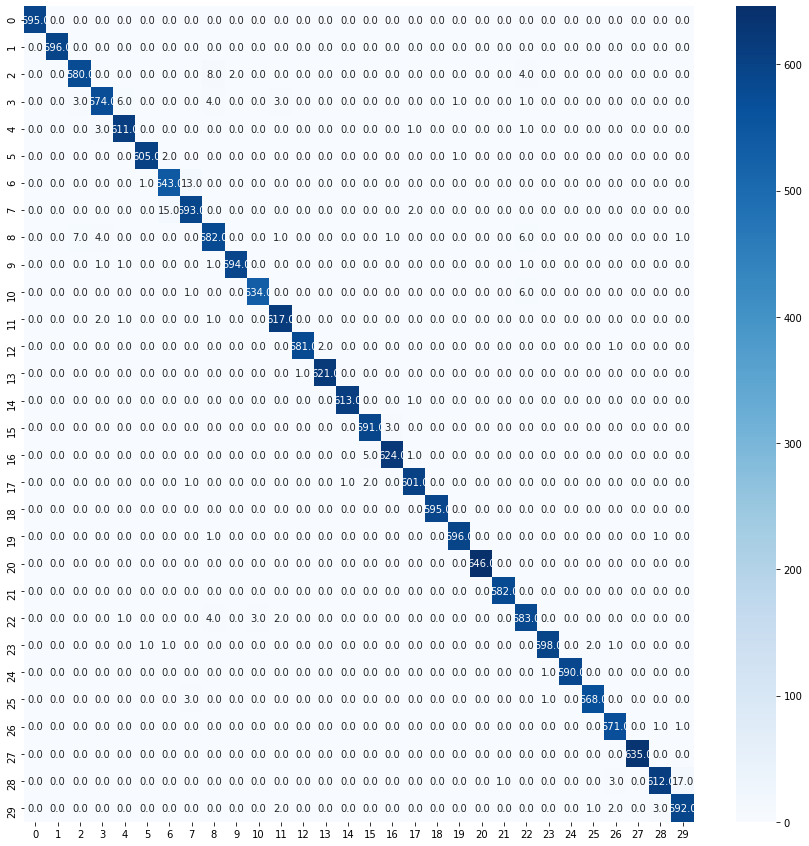

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt2
cf_matrix = confusion_matrix(y_test, y_test_pred)
plt2.figure(figsize=(15,15))
sns.heatmap(cf_matrix, annot=True,fmt=".1f",cmap='Blues' )
plt2.show()

In [ ]:
cm2 = confusion_matrix(y_test, y_test_pred)
print(cm2)

[[595   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 596   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 580   0   0   0   0   0   8   2   0   0   0   0   0   0   0   0
    0   0   0   0   4   0   0   0   0   0   0   0]
 [  0   0   3 574   6   0   0   0   4   0   0   3   0   0   0   0   0   0
    0   1   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   3 611   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0 605   2   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1 543  13   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  15 593   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0   0   0   0   0]


### Añadimos ruido aleatorio a un intervalo dentro de cada muestra.

El intervalo empezará en una posición aleatoria y diferente para cada muestra.

Se fija el valor del intervalo aunque podría hacerse también variable.

Se calcula la diferencia entre el máximo y 1 y se genera un ruido aleatorio centrado en 0 y desviación típica esa diferencia multiplicada por una variable alpha.


In [ ]:
def add_noise (X_n, range_inter,alpha):
       
    for i in range(X_n.shape[0]):
        x_start= random.randint(0, 1000-range_inter)     # punto inicial desde donde vamos a incluir el ruido, cambia para cada muestra
        x_end= x_start + range_inter                     # punto final del ruido.
        
        diff= 1 - max(X_n[i][x_start: x_end].clip(0, 1)) # calculamos la diferencia entre uno y el valor máximo de la muestra en el intervalo
        if (diff == 0): diff = 0.001                     # si el valor máximo en el intervalo es igual a 1, hacemos al menos hay una pequeña diferencia para incluir ruido y que las muestras no sean iguales.
        
        # calculamos ruido 
        noise = np.random.normal(0, diff*alpha,range_inter)
        X_n[i][x_start: x_end] += noise
    
    return X_n

### Ejemplo de visualización de datos con ruido.

In [ ]:
range_inter = 150                 # longitud del intervalo. Puede hacerse variable.
alpha = 0.25                      # Porcentaje sobre la diferencia del maximo a 1
X_noise= X_test.copy()
v_plot = np.random.randint(0, X_noise.shape[0], 3)
X_noise = add_noise (X_noise[v_plot], range_inter,alpha)

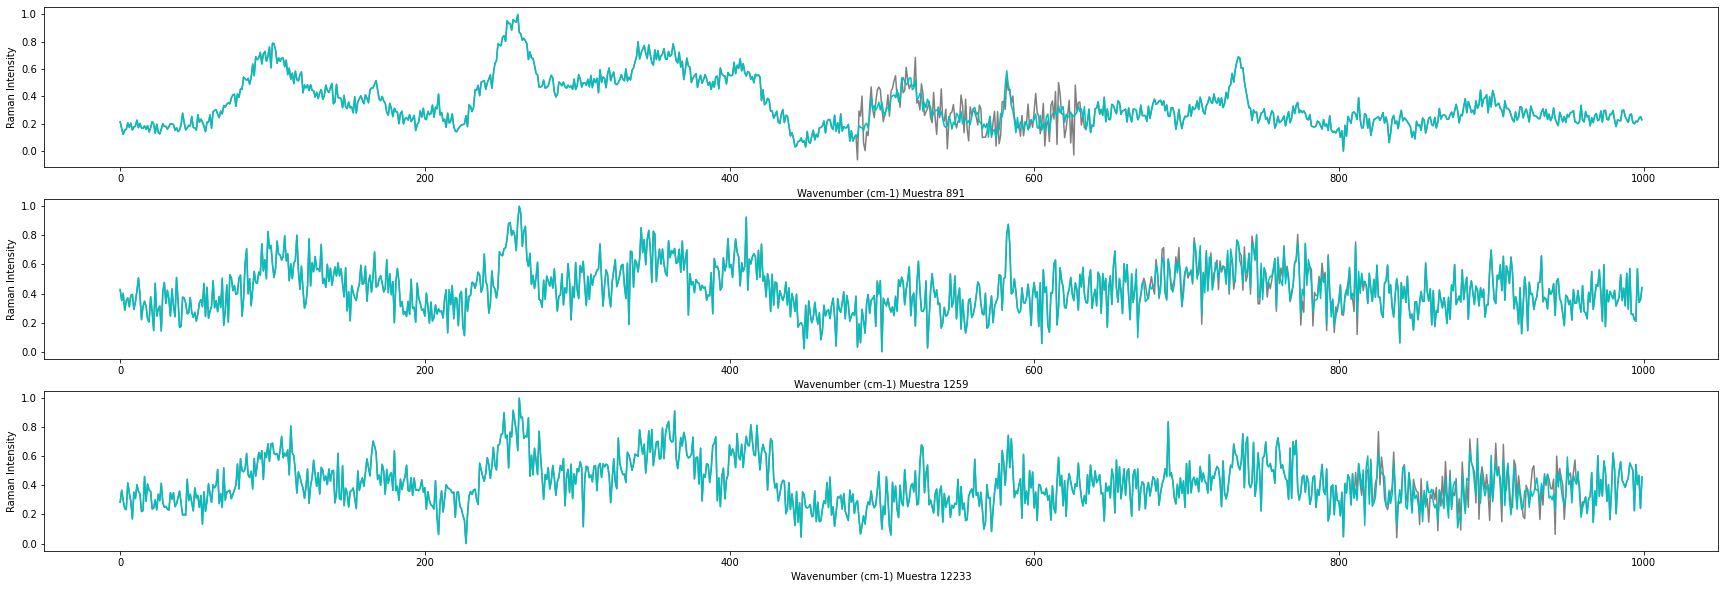

In [ ]:
# Mostramos algunos ejemplos de cómo quedarían las muestras tras añadir el ruido
figure =plt.gcf()
figure.set_size_inches(30,10)

plt.subplot(311)
label = 'Wavenumber (cm-1) Muestra ' + str(v_plot[0])
plt.xlabel(label)
plt.ylabel('Raman Intensity')
plt.plot(X_noise[0], color='grey')
plt.plot(X_test[v_plot[0]], color='c')

plt.subplot(312)
label = 'Wavenumber (cm-1) Muestra ' + str(v_plot[1])
plt.xlabel(label)
plt.ylabel('Raman Intensity')
plt.plot(X_noise[1], color='grey')
plt.plot(X_test[v_plot[1]], color='c')

plt.subplot(313)
label = 'Wavenumber (cm-1) Muestra ' + str(v_plot[2])
plt.xlabel(label)
plt.ylabel('Raman Intensity')
plt.plot(X_noise[2], color='grey')
plt.plot(X_test[v_plot[2]], color='c')

plt.show() 

### Predecimos con los datos con ruido

Generarmos distintos escenarios variando el intervalo de ruido y la amplitud del mismo para ver el comportamiento 

In [ ]:
range_inter = [0, 50, 100, 150]                             # longitud del intervalo. 
alpha_list = [0, 0.1, 0.25, 0.40, 0.55, 0.70, 0.85, 1.0]       # Porcentaje sobre la diferencia del maximo a 1
df = pd.DataFrame(np.zeros((len(alpha_list), len(range_inter))),
                  index=alpha_list,
                  columns=range_inter)

In [ ]:
# Inicializamos la primera columna al valor de f1 para los datos de test del estudio.
df.loc[:][0]=f1_score(y_test, y_test_pred, average='micro')
df.loc[0][:]=f1_score(y_test, y_test_pred, average='micro')

In [ ]:
df

,0,50,100,150
0.00,0.990167,0.990167,0.990167,0.990167
0.10,0.990167,0.000000,0.000000,0.000000
0.25,0.990167,0.000000,0.000000,0.000000
0.40,0.990167,0.000000,0.000000,0.000000
0.55,0.990167,0.000000,0.000000,0.000000
0.70,0.990167,0.000000,0.000000,0.000000
0.85,0.990167,0.000000,0.000000,0.000000
1.00,0.990167,0.000000,0.000000,0.000000


In [ ]:
X_test_cnn = np.reshape(X_test,(X_test.shape[0],1000,1))
y_test_cnn = np.reshape(y_test,(y_test.shape[0],1))
y_t_cnn_c = keras.utils.to_categorical(y_test_cnn, n_classes)

In [ ]:
# Calculamos la medida de f1 para distintos valores de rango de intervalo y de alpha para ver el comportamiento.
for range_i in range_inter[1:]:
  for alpha in alpha_list[1:]:
    X_noise= X_test.copy()                                                                       # reiniciamos los datos con los originales de test del estudio
    X_noise = add_noise (X_noise, range_i, alpha)                                                # aplicamos ruido
    file_name= './data/X_noise_CNN_'+ str(range_i)+'_'+ str(alpha) +'.npy'                       # nombre del fichero para guardar los datos.
    np.save ( file_name ,X_noise)                                                                # guardamos los datos por si queremos recuperarlos como nuevos datos
    X_t_test_noise_cnn = np.reshape(X_noise,(X_test.shape[0],1000,1))                            # reescalamos los datos de entrada para ajustar a la CNN
    ypred_noise_c = model_cnn2.predict(X_t_test_noise_cnn)                                       # hacemos la prediccion sobre los datos
    df.loc[alpha][range_i] = f1_score(y_test, np.argmax(ypred_noise_c, axis=1), average='micro') # guardamos los resultados


In [ ]:
df

,0,50,100,150
0.00,0.990167,0.990167,0.990167,0.990167
0.10,0.990167,0.989944,0.989889,0.990056
0.25,0.990167,0.989333,0.989667,0.989222
0.40,0.990167,0.988167,0.987167,0.985611
0.55,0.990167,0.984556,0.981667,0.976556
0.70,0.990167,0.977222,0.968000,0.955667
0.85,0.990167,0.965611,0.947056,0.930111
1.00,0.990167,0.950444,0.920444,0.894556


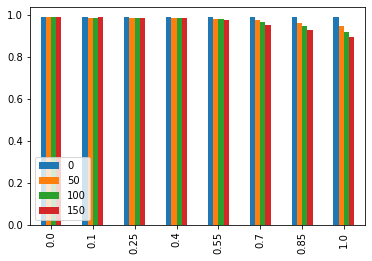

In [ ]:
# para cada valor de alpha, mostramos el resultado de f1 al variar el ancho del intervalo.
df.plot.bar();
plt.legend(loc=3)

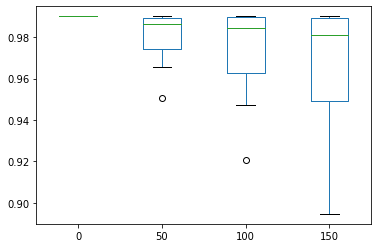

In [ ]:
# para cada ancho de intervalo, mostramos la variabilidad de f1
df.plot.box()

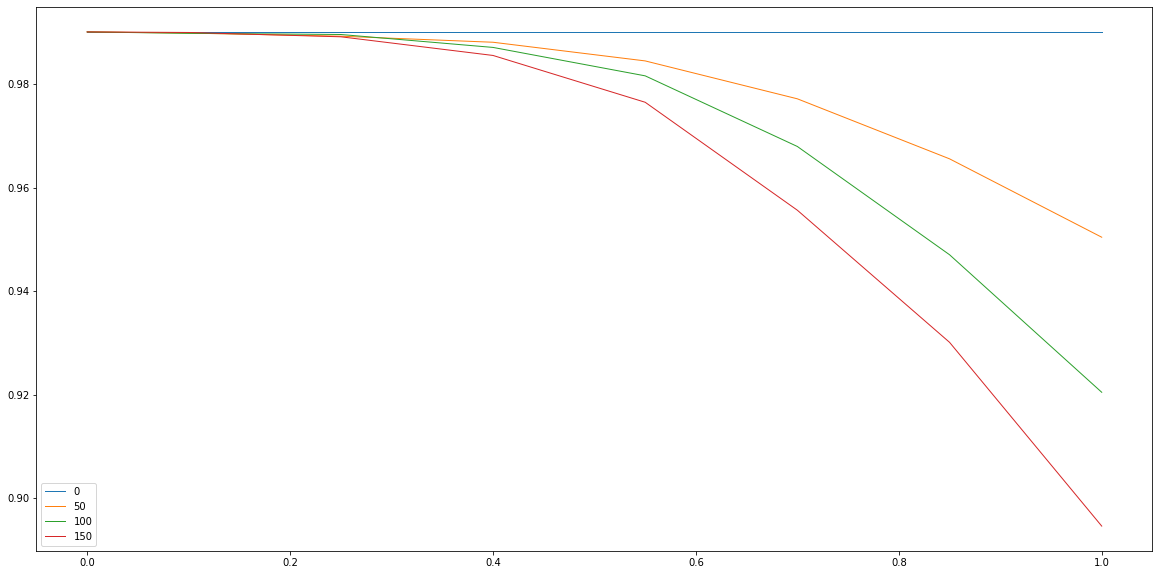

In [ ]:
# valores de f1 para cada valor de alpha y cada ancho de intervalo
df.plot.line(figsize=(20,10),lw=1);

### Análisis de resultados

Al igual que pasaba con SVC se puede ver que según aumenta el valor de alpha la precisión va disminuyendo.  
Con valores de alpha hasta 0.55 los la precisión se mantiene por encima de 0.976556, en el peor de los casos, para el intervalo con 150 características con ruido.  
Para valores mayores de alpha la precisión disminuye.  
- Si el intervalo contiene 50 características con ruido, con alpha superior a 0.55 la disminución de precisión disminuye 0.039723 del valor inicial sin ruido en el caso de mayor alpha, 1. Aún así, la precisión sigue siendo superior a 0,95.  
- Si el intervalo contine 100 características, para alpha superiores a 0.55, la disminución de la precisión se multiplica por 1.7 respecto a intervalo de 50 caraterísticas.

- Si el intervalo contiene 150 características, para alpha superiores a 0.55, la disminución de la precisión se multiplica por 2.4 respecto a intervalo de 50 caraterísticas.

Por lo tanto se puede decir que en el caso de CCN la variación de 50 características y una amplitud media de ruido del 0.5 mantiene la precisión. Con intervalos mayores o ruidos más intensos la disminución de la precisión sería 1.7 o 2.4 veces mayor.

## Aplicación de ruido al modelo CNN entrenado con finetune

En el Hito 1 del reto, se entrenó el modelo no sólo con el dataset de referencia, X_reference, también se entrenó el modelo con el dataset X_finetune y finalmente se aplicó el modelo entrenado al dataset X_test.  
Probamos en este caso con el modelo entrenado con los datos de finetune, previamente guardado: modelo_model_cnn2_entrenado_ft.h5 y lo aplicamos a los datos del dataset X_test y a este dataset X_test aplicamos también ruido para ver cómo afecta a este modelo.

In [ ]:
# Para el caso de volver a cargar el modelo
model_cnn2 = keras.models.load_model('modelo_model_cnn2_entrenado_ft.h5')

In [ ]:
# cargamos los datos de test del estudio
X_test2 = np.load('./data/X_test.npy')
y_test2 = np.load('./data/y_test.npy')

In [ ]:
# redimensionamos los datos para adaptarlos a la entrada de la CNN
X_test_cnn = np.reshape(X_test2,(X_test2.shape[0],1000,1))
y_test_cnn = np.reshape(y_test2,(y_test2.shape[0],1))
y_t_cnn_c = keras.utils.to_categorical(y_test_cnn, n_classes)

In [ ]:
# predecimos para los datos de test
y_test_pred_c = model_cnn2.predict(X_test_cnn)
score2 = model_cnn2.evaluate(X_test_cnn, y_t_cnn_c, verbose=0)
cnn2_test_acc =score2[1]
print('%s %s: %f'%(name,' Test ',  cnn2_test_acc))

CNN2 ConvD1  Test : 0.851333


In [ ]:
y_test_pred = np.argmax(y_test_pred_c, axis=1)

In [ ]:
f1_score(y_test2, y_test_pred, average='micro')

0.8513333333333334

In [ ]:
cr2 = classification_report(y_test2, y_test_pred)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       100
         1.0       0.97      1.00      0.99       100
         2.0       0.76      0.70      0.73       100
         3.0       0.84      1.00      0.91       100
         4.0       0.78      0.74      0.76       100
         5.0       1.00      1.00      1.00       100
         6.0       0.90      0.70      0.79       100
         7.0       0.67      0.85      0.75       100
         8.0       0.63      0.70      0.66       100
         9.0       0.80      0.72      0.76       100
        10.0       0.96      0.90      0.93       100
        11.0       0.77      0.30      0.43       100
        12.0       0.71      0.97      0.82       100
        13.0       0.99      0.72      0.83       100
        14.0       0.97      1.00      0.99       100
        15.0       0.84      0.92      0.88       100
        16.0       0.82      0.83      0.83       100
        17.0       0.89    

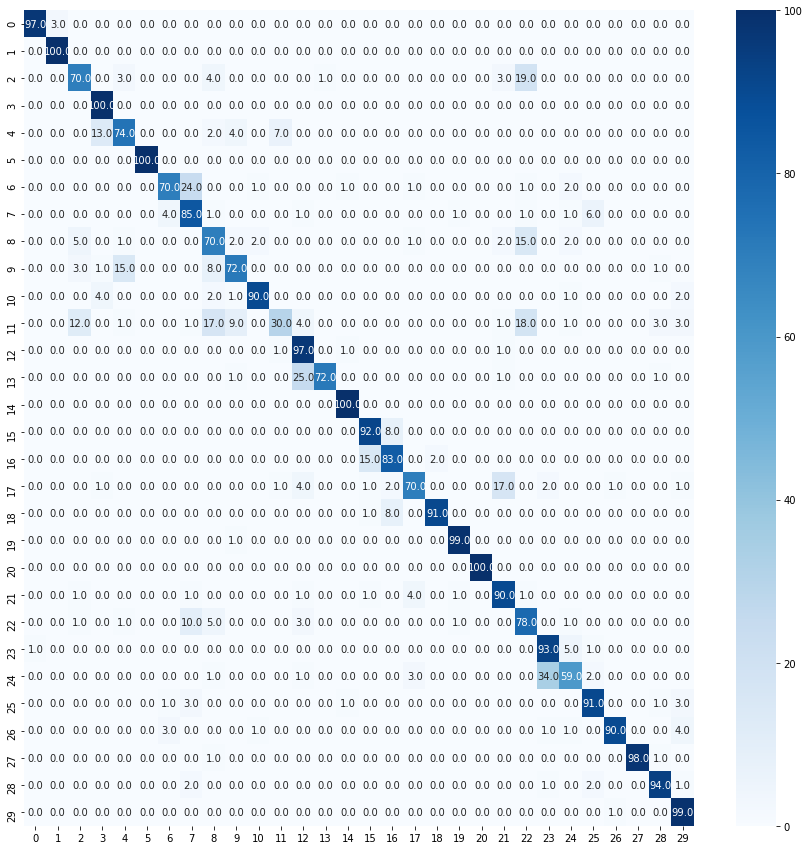

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt2
cf_matrix = confusion_matrix(y_test2, y_test_pred)
plt2.figure(figsize=(15,15))
sns.heatmap(cf_matrix, annot=True,fmt=".1f",cmap='Blues' )
plt2.show()

In [ ]:
cm2 = confusion_matrix(y_test2, y_test_pred)
print(cm2)

[[ 97   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  70   0   3   0   0   0   4   0   0   0   0   1   0   0   0   0
    0   0   0   3  19   0   0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  13  74   0   0   0   2   4   0   7   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70  24   0   0   1   0   0   0   1   0   0   1
    0   0   0   0   1   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   4  85   1   0   0   0   1   0   0   0   0   0
    0   1   0   0   1   0   1   6   0   0   0   0]


### Predecimos con los datos con ruido

Generarmos distintos escenarios variando el intervalo de ruido y la amplitud del mismo para ver el comportamiento 

In [ ]:
range_inter = [0, 50, 100, 150]                                # longitud del intervalo. 
alpha_list = [0, 0.1, 0.25, 0.40, 0.55, 0.70, 0.85, 1.0]       # Porcentaje sobre la diferencia del maximo a 1
df = pd.DataFrame(np.zeros((len(alpha_list), len(range_inter))),
                  index=alpha_list,
                  columns=range_inter)

In [ ]:
# Inicializamos la primera columna al valor de f1 para los datos de test del estudio.
df.loc[:][0]=f1_score(y_test2, y_test_pred, average='micro')
df.loc[0][:]=f1_score(y_test2, y_test_pred, average='micro')

In [ ]:
df

,0,50,100,150
0.00,0.851333,0.851333,0.851333,0.851333
0.10,0.851333,0.000000,0.000000,0.000000
0.25,0.851333,0.000000,0.000000,0.000000
0.40,0.851333,0.000000,0.000000,0.000000
0.55,0.851333,0.000000,0.000000,0.000000
0.70,0.851333,0.000000,0.000000,0.000000
0.85,0.851333,0.000000,0.000000,0.000000
1.00,0.851333,0.000000,0.000000,0.000000


In [ ]:
X_test_cnn = np.reshape(X_test2,(X_test2.shape[0],1000,1))
y_test_cnn = np.reshape(y_test2,(y_test2.shape[0],1))
y_t_cnn_c = keras.utils.to_categorical(y_test_cnn, n_classes)

In [ ]:
# Calculamos la medida de f1 para distintos valores de rango de intervalo y de alpha para ver el comportamiento.
for range_i in range_inter[1:]:
  for alpha in alpha_list[1:]:
    X_noise= X_test2.copy()                                                                         # reiniciamos los datos con los originales de test del estudio
    X_noise = add_noise (X_noise, range_i, alpha)                                                   # aplicamos ruido
    file_name= './data/X_noise_CNN_test'+ str(range_i)+'_'+ str(alpha) +'.npy'                      # nombre del fichero para guardar los datos.
    np.save ( file_name ,X_noise)                                                                   # guardamos los datos por si queremos recuperarlos como nuevos datos
    X_t_test_noise_cnn = np.reshape(X_noise,(X_test2.shape[0],1000,1))                              # reescalamos los datos de entrada para ajustar a la CNN
    ypred_noise_c = model_cnn2.predict(X_t_test_noise_cnn)                                          # hacemos la prediccion sobre los datos
    df.loc[alpha][range_i] = f1_score(y_test2, np.argmax(ypred_noise_c, axis=1), average='micro')   # guardamos los resultados


In [ ]:
df

,0,50,100,150
0.00,0.851333,0.851333,0.851333,0.851333
0.10,0.851333,0.848667,0.848333,0.850000
0.25,0.851333,0.851333,0.849333,0.847667
0.40,0.851333,0.844333,0.839667,0.843333
0.55,0.851333,0.832000,0.839667,0.825000
0.70,0.851333,0.825333,0.807000,0.808333
0.85,0.851333,0.805000,0.795333,0.775000
1.00,0.851333,0.782667,0.760333,0.737333


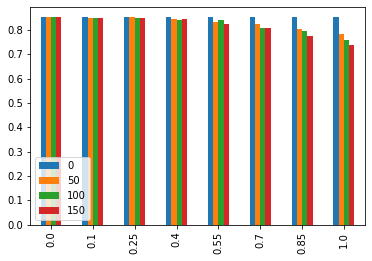

In [ ]:
# para cada valor de alpha, mostramos el resultado de f1 al variar el ancho del intervalo.
df.plot.bar();
plt.legend(loc=3)

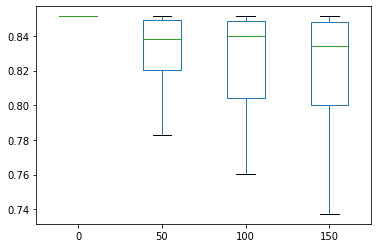

In [ ]:
# para cada ancho de intervalo, mostramos la variabilidad de f1
df.plot.box()

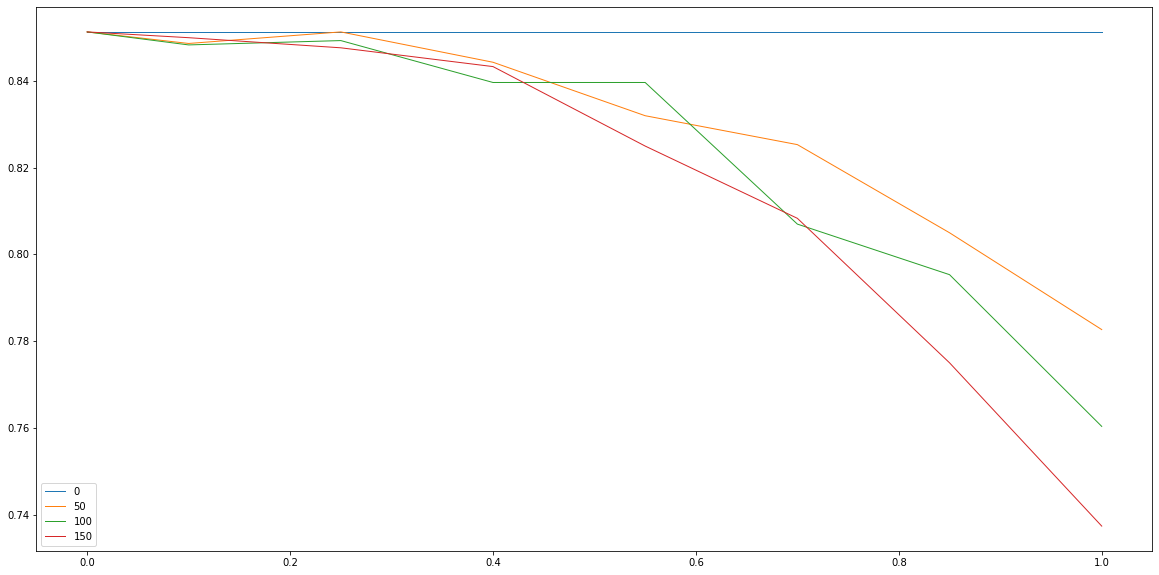

In [ ]:
# valores de f1 para cada valor de alpha y cada ancho de intervalo
df.plot.line(figsize=(20,10),lw=1);

### Análisis de resultados

Se observa la misma tendencia que en el caso del dataset de referencia, aunque en este caso para los intervalos con 100 características con ruido, la tendencia no es tan clara como en el caso anterior. Por ejemplo para alpha = 0.55 y 100 características los valores son mejores incluso que con 50 características con ruido. Una causa de esto puede ser que los intervalos en los que se haya aplicado el ruido no sean relevantes para la detección del tipo de bacterias y se mantenga sin ruido las características más representativas.

Para el resto de intervalos y valores de alpha la tendencia es la misma mostrada en los casos anteriores, tanto con SVC como con CNN en el dataset de referencia.

Con intervalos con 50 características con ruido y alpha = 0.4 la variación de 0.007 permite mantener la precisión superior a 0.84. Para valores mayores de alpha y mayores características afectadas podría considerarse no aceptable.
